In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [277]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [0]:
train['source']='train'
test['source']='test'
df = pd.concat([train,test], ignore_index = True, sort = False)

In [279]:
print(df['User_ID'].nunique())
print(df['Product_ID'].nunique())



5891
3677


In [280]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum())/df.isnull().count().sort_values(ascending=False) * 100
missing_df = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_df.head(20)


,Total,Percent
Product_Category_3,545809,69.648078
Product_Category_2,245982,31.388587
Purchase,233599,29.808452
source,0,0.000000
Product_Category_1,0,0.000000
Marital_Status,0,0.000000
Stay_In_Current_City_Years,0,0.000000
City_Category,0,0.000000
Occupation,0,0.000000
Age,0,0.000000


In [0]:
#Imputing Product Category 2 and 3 with 0 - Product belongs to no category from 2 and 3.
df.Product_Category_2.fillna(value = 0, inplace = True)
df.Product_Category_3.fillna(value = 0, inplace = True)
#Dropping UID and PID as these are not useful features for regression
df = df.drop(['User_ID','Product_ID'], axis=1)

In [282]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum())/df.isnull().count().sort_values(ascending=False) * 100
missing_df = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_df.head(20)

,Total,Percent
Purchase,233599,29.808452
source,0,0.000000
Product_Category_3,0,0.000000
Product_Category_2,0,0.000000
Product_Category_1,0,0.000000
Marital_Status,0,0.000000
Stay_In_Current_City_Years,0,0.000000
City_Category,0,0.000000
Occupation,0,0.000000
Age,0,0.000000


In [283]:
df.info()
df_Gender = pd.get_dummies(df['Gender'])
df_Age = pd.get_dummies(df['Age'])
df_City_Category = pd.get_dummies(df['City_Category'])
df_Stay_In_Current_City_Years = pd.get_dummies(df['Stay_In_Current_City_Years'])
df_Occupation = pd.get_dummies(df['Occupation'])
df_Product_Category_1 = pd.get_dummies(df['Product_Category_1'])
df_Product_Category_2 = pd.get_dummies(df['Product_Category_2'])
df_Product_Category_2 = pd.get_dummies(df['Product_Category_2'])
df = pd.concat([df, df_Occupation, df_Product_Category_1, df_Product_Category_2, df_Gender, df_Age, df_City_Category, df_Stay_In_Current_City_Years], axis=1)
df.head()
df = df.drop(['Product_Category_1', 'Product_Category_2', 'Gender','Age', 'City_Category', 'Stay_In_Current_City_Years'], axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
Gender                        783667 non-null object
Age                           783667 non-null object
Occupation                    783667 non-null int64
City_Category                 783667 non-null object
Stay_In_Current_City_Years    783667 non-null object
Marital_Status                783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Purchase                      550068 non-null float64
source                        783667 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 65.8+ MB


In [284]:
train = df.loc[df['source']=="train"]
test = df.loc[df['source']=="test"]
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
#Save Files
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [0]:
#Load The Saved Files
train_df = pd.read_csv('train_modified.csv')
test_df = pd.read_csv('test_modified.csv')


In [0]:
final_df = train_df.drop(['Purchase'], axis=1)
X = final_df 
y = train_df['Purchase']

In [0]:
#Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
#Linear Regression
lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)
lm.score(X_train, y_train)
y_pred = lm.predict(X_test)
lrscore = r2_score(y_test,y_pred)

In [296]:
#Cross Validation - Linear Regression
scores = cross_val_score(lm, X_train, y_train, cv = 5)
print(scores, np.mean(scores), np.std(scores))
y_pred = cross_val_predict(lm, X_test, y_test, cv = 5)
lrcvscore = r2_score(y_test, y_pred)

[0.64286362 0.64373941 0.64124463 0.64374405 0.64057865] 0.642434073019738 0.0013009090161090078


In [0]:
#Lasso
LR = Lasso(alpha=0.05,normalize=True)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
lassoscore = r2_score(y_test,y_pred)

In [232]:
#Cross Validation - Lasso
alphas = 10**np.linspace(10,-2,100)*0.5
lassocv = LassoCV(alphas = alphas, normalize = True)
lassocv.fit(X, y)
LRCV = Lasso(alpha=lassocv.alpha_,normalize=True)
LRCV.fit(X_train, y_train)
y_pred = LRCV.predict(X_test)
lassocvscore = r2_score(y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [0]:
#Ridge
RR = Ridge(alpha=0.05,normalize=True)
RR.fit(X_train,y_train)
y_pred = RR.predict(X_test)
ridgescore = r2_score(y_test,y_pred)

In [0]:
#Cross Validation - Ridge
alphas = 10**np.linspace(10,-2,100)*0.5
ridgecv = RidgeCV(alphas = alphas, scoring = 'r2', normalize = True)
ridgecv.fit(X, y)
RRCV = Ridge(alpha=ridgecv.alpha_, normalize=True)
RRCV.fit(X_train, y_train)
y_pred = RRCV.predict(X_test)
ridgecvscore = r2_score(y_test,y_pred)

In [0]:
#ElasticNet
en = ElasticNet()
en.fit(X_train,y_train)
y_pred = en.predict(X_test)
enscore = r2_score(y_test,y_pred)

In [0]:
#Cross Validation - ElasticNet
params = {"alpha":np.arange(0.1, 2, 0.1)}
en_cv = GridSearchCV(estimator=en, param_grid=params, cv = 5)
en_cv.fit(X_train,y_train)
y_pred=en_cv.predict(X_test)
encvscore = r2_score(y_test,y_pred)

In [237]:
print(en_cv.best_estimator_)
print(en_cv.best_score_)
print(en_cv.best_params_)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
0.4585481247769708
{'alpha': 0.1}


In [0]:
#############DECISION TREE
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train['source']='train'
test['source']='test'
df_dtr = pd.concat([train,test], ignore_index = True, sort = False)


In [0]:
df_dtr.Product_Category_2.fillna(value = 0, inplace = True)
df_dtr.Product_Category_3.fillna(value = 0, inplace = True)
#Label Encoding
df_dtr['User_ID']= label_encoder.fit_transform(df_dtr['User_ID'])
df_dtr['Product_ID']= label_encoder.fit_transform(df_dtr['Product_ID'])
df_dtr['Gender']= label_encoder.fit_transform(df_dtr['Gender'])
df_dtr['Age']= label_encoder.fit_transform(df_dtr['Age'])
df_dtr['Occupation']= label_encoder.fit_transform(df_dtr['Occupation'])
df_dtr['City_Category']= label_encoder.fit_transform(df_dtr['City_Category'])
df_dtr['Stay_In_Current_City_Years']= label_encoder.fit_transform(df_dtr['Stay_In_Current_City_Years'])

In [261]:
train = df_dtr.loc[df_dtr['source']=="train"]
test = df_dtr.loc[df_dtr['source']=="test"]
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
#Save Files
train.to_csv("train_dtr_modified.csv",index=False)
test.to_csv("test_dtr_modified.csv",index=False)

In [0]:
#Load The Saved Files
train_df = pd.read_csv('train_dtr_modified.csv')
test_df = pd.read_csv('test_dtr_modified.csv')


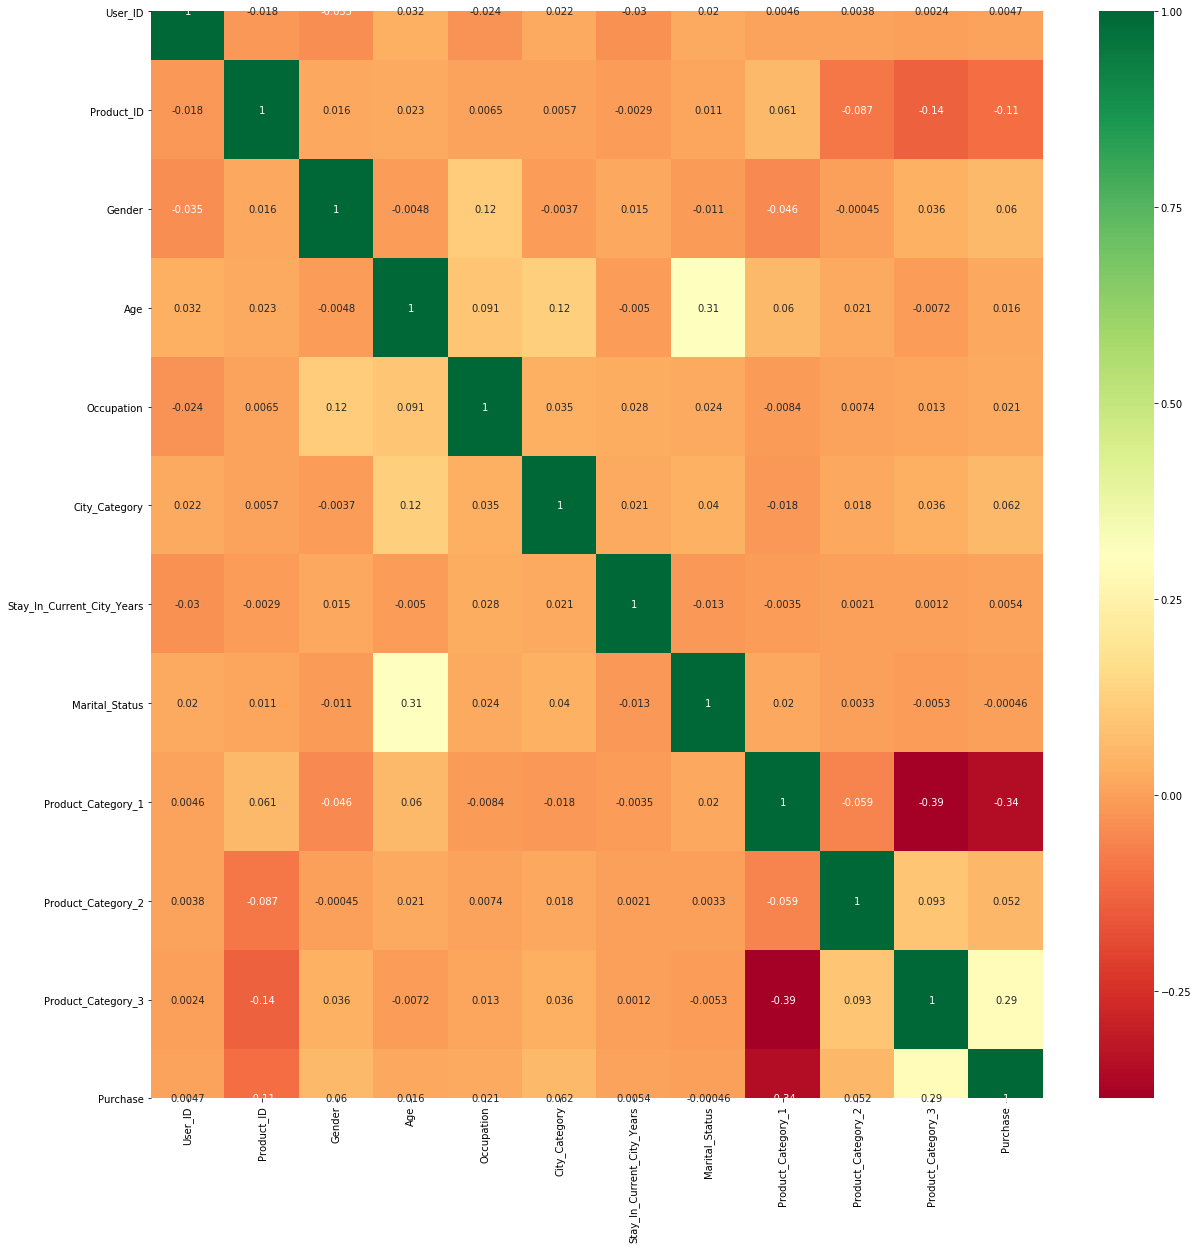

In [243]:
#Correlation
corrmat = df_dtr.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df_dtr[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [0]:
final_df = train_df.drop(['Purchase'], axis=1)
X = final_df 
y = train_df['Purchase']

In [274]:
X

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,684,0,0,10,0,2,0,3,0,0
1,0,2406,0,0,10,0,2,0,1,5,11
2,0,868,0,0,10,0,2,0,12,0,0
3,0,844,0,0,10,0,2,0,12,13,0
4,1,2769,1,6,16,2,4,0,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...
550063,5883,3612,1,5,13,1,1,1,20,0,0
550064,5885,3613,0,2,1,2,3,0,20,0,0
550065,5886,3613,0,2,15,1,4,1,20,0,0
550066,5888,3613,0,6,1,2,2,0,20,0,0


In [0]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
#Decision Tree Regressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred = dtr.predict(X_test)
dtr.score(X_train, y_train)
dtrscore = r2_score(y_test,y_pred)

In [267]:
#Decision Tree Using Grid Search CV
params = {"max_depth":np.arange(10,20,2)}
dtr_cv = GridSearchCV(estimator=dtr, param_grid=params)
dtr_cv.fit(X,y)
y_pred = dtr_cv.predict(X_test)
dtr_cv.score(X_train, y_train)
dtrcvscore = r2_score(y_test,y_pred)
print(dtr_cv.best_estimator_)
print(dtrcvscore)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTreeRegressor(criterion='mse', max_depth=12, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
0.7112865903589505


In [268]:
#Features
rankings = dtr_cv.best_estimator_.feature_importances_.tolist()
features = list(X)
d = dict(zip(features,rankings))
d = pd.DataFrame(list(d.items()), columns=["features", "ranking"])
d.sort_values(["ranking"], ascending=False)

,features,ranking
8,Product_Category_1,0.897198
1,Product_ID,0.064614
9,Product_Category_2,0.012282
10,Product_Category_3,0.011498
0,User_ID,0.004785
5,City_Category,0.002827
3,Age,0.002579
4,Occupation,0.001952
2,Gender,0.001001
6,Stay_In_Current_City_Years,0.000902


In [271]:
#Check For Output File
#test_df = test_df.drop(['Purchase'], axis=1)
test_pred = dtr_cv.predict(test_df)
test = pd.read_csv("test.csv")
new = test[['User_ID', 'Product_ID']].copy()
new['Purchase'] = test_pred
new.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,14015.238095
1,1000009,P00113442,11442.781609
2,1000010,P00288442,6213.817961
3,1000010,P00145342,2352.226667
4,1000011,P00053842,2705.083799


In [0]:
new.to_csv('output.csv',index=False)

In [273]:
data = {'Method':['Linear Regression', 'Lasso', 'Ridge', 'ElasticNet', 'Decision Tree'],'R2 Score':[lrscore,lassocvscore,ridgecvscore,encvscore,dtrcvscore]}
df = pd.DataFrame(data)
print(df)

              Method  R2 Score
0  Linear Regression  0.641030
1              Lasso  0.637949
2              Ridge  0.641040
3         ElasticNet  0.459414
4      Decision Tree  0.711287


In [252]:
dtrcvscore

0.7096561193736206